# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### SECOND DATASET - MULTINEWS WITH DISCUSSION ABOUT A VETERANS PAYMENT

In [1]:
import pandas as pd
import re

# Define the file paths
src_file = 'datasets/multi_news/val.txt.src'  
tgt_file = 'datasets/multi_news/val.txt.tgt' 

# Load the .txt.src file (source articles)
with open(src_file, 'r', encoding='utf-8') as src:
    articles = src.readlines()

# Load the .txt.tgt file (target summaries)
with open(tgt_file, 'r', encoding='utf-8') as tgt:
    summaries = tgt.readlines()

dict_multinews = {'articles': articles, 
                 'summary': summaries}


# Create DataFrames
multinews_df = pd.DataFrame(dict_multinews)

# Clean the newlines from both columns
multinews_df['articles'] = multinews_df['articles'].str.strip()
multinews_df['summary'] = multinews_df['summary'].str.strip()

text = multinews_df.iloc[1].articles
original_summary =  multinews_df.iloc[1].summary
print(f'The summary of the articles is:\n{original_summary}')
articles = text.split('.  ')
articles = [article.strip() for article in articles]


df_sum_3 = pd.DataFrame()
# Assign the list of articles to a new column named 'content'
df_sum_3['content'] = articles

The summary of the articles is:
– a major snafu has hit benefit payments to student veterans under the gi bill — and congressional aides tells nbc that they have been told the veterans are never going to be paid back . the aides say they were told by the department of veterans affairs that the va will not be making retroactive payments to veterans who were underpaid for their housing allowance because it would mean reviewing around 2 millions claims , further delaying implementation of a new system , which has already been pushed back to dec. 2019. under the forever gi bill signed into law by president trump last year , students are supposed to be paid housing allowance based on where they take the most classes , not on where the school ' s main campus is located . tanya ang , vice president of veterans education success , tells the military times that the va ' s excuse of retroactive payments creating too much work isn ' t good enough . " that could be hundreds of dollars for some stu

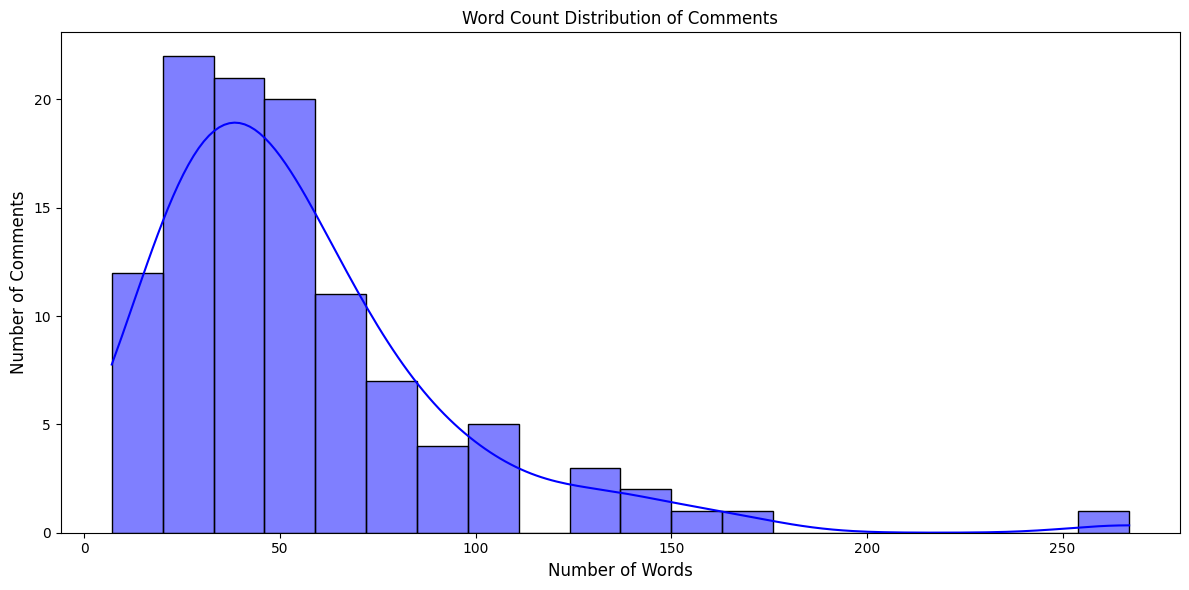

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [3]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [4]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = "Veterans' GI Bill payment delays"

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|████████▏                                                                                                                 | 1/15 [00:03<00:51,  3.69s/it]

The comments primarily address the significant delays in the distribution of GI Bill payments to veterans, which have resulted in financial hardships, particularly for first-time students. Dr. Hilary Miller from Middle Tennessee State University reports that veterans have gone months without benefits due to VA technical issues. At the University of Memphis, complaints have been frequent, highlighting widespread dissatisfaction among veterans waiting for payments. Additionally, concerns are raised about the Senate's delay in confirming James Gfrerer, a qualified nominee, which is seen as contributing to the inefficiencies. Some veterans expressed desperation to remain enrolled despite financial difficulties. The VA announced a future expansion effective in 2019 and the removal of expiration dates for certain work-study activities, aiming to improve educational assistance. However, thousands of veterans still face waiting periods exceeding 30 days, exacerbating the backlog and hardship a

 13%|████████████████▎                                                                                                         | 2/15 [00:07<00:52,  4.01s/it]

The latest group of comments reveals ongoing frustration with the outdated IT systems used by the Department of Veterans Affairs (VA), which have been identified as a critical factor in the delays of GI Bill payments to veterans. The antiquated technology, reportedly over half a century old, is causing significant issues, as highlighted by Booz Allen Hamilton, the VA's contractor. This problem is exacerbated by insufficient software and hardware support. Additionally, the VA announced that the necessary IT fixes will not be completed until December 2019, well past the initial deadline, prompting calls for legislative action to protect student veterans from school penalties due to late payments. Concerns persist about underpaid benefits, although the VA has stated that overpaid students will not be held liable. Veterans continue to face delayed or incorrect payments, creating hardships for numerous military-affiliated students in institutions like Austin Peay State University. This syst

 20%|████████████████████████▍                                                                                                 | 3/15 [00:12<00:53,  4.45s/it]

The recent comments provide insights into the ongoing challenges faced by veterans due to GI Bill payment delays. Notably, while institutions like Vanderbilt have managed to preemptively address regulatory changes for their relatively small veteran student populations, broader issues persist. The VA's attempt to redesign the calculation of Post-9/11 GI Bill housing rates amidst an academic season caused significant frustration. VA Secretary Robert Wilkie announced plans to reset the implementation, intending to get the technology and formula right, albeit delaying IT updates. In the interim, housing allowances will align with the Department of Defense rates, often matching or exceeding previous amounts. Meanwhile, institutions like Middle Tennessee State University (MTSU) proactively informed and prepared students for possible delays, alongside community efforts to support affected veterans. Despite the VA's claimed legal justifications for some actions, there remains a significant bac

 27%|████████████████████████████████▌                                                                                         | 4/15 [00:18<00:55,  5.04s/it]

Recent discussions have highlighted continuing issues surrounding the delays in GI Bill payments to veterans, primarily due to outdated IT systems within the Department of Veterans Affairs (VA). Veterans who started using the Post-9/11 GI Bill on or after January 1, 2018, now receive housing allowances based on reduced Department of Defense (DoD) rates, while those who began earlier benefit from higher, non-adjusted rates. This has contributed to confusion and financial strain as the VA's system has struggled to accommodate these changes alongside regulatory adjustments, such as housing rates based on school zip codes rather than veterans' residences. Veterans have shared escalating concerns about delayed benefits leading to financial distress, exemplified by cases like a veteran forced to consider additional jobs and another who dropped out of classes. Legislative pressure remains on the VA to prioritize timely, accurate payments, with calls for an effective IT overhaul and accountabi

 33%|████████████████████████████████████████▋                                                                                 | 5/15 [00:23<00:49,  4.99s/it]

The latest comments on GI Bill payment delays highlight a variety of issues affecting veterans' educational benefits. A notable change under the Survivors’ and Dependents’ Educational Assistance (DEA) program reduces entitlement from 45 to 36 months for new enrollees post-August 1, 2018, while those enrolled earlier remain eligible for 45 months. Veterans, such as Baker, face significant delays in receiving payments, with many in Tennessee and nationwide still awaiting resolution from the Department of Veterans Affairs (VA) due to a backlog exacerbated by the Forever GI Bill's enactment in 2017. This delay has forced some, like Baker, to drop classes and repay tuition for courses attended without the expected benefits.

Concerns also emerged over the VA's unfulfilled promise to reimburse veterans underpaid on their benefits. Furthermore, the Yellow Ribbon Program is extended to active-duty service members starting August 1, 2022, expanding eligibility.

Dr. Hilary Miller, from Middle T

 40%|████████████████████████████████████████████████▊                                                                         | 6/15 [00:27<00:41,  4.64s/it]

The comments highlight ongoing issues and recent changes impacting veterans' GI Bill benefits. A key topic is the provision of detailed beneficiary entitlement information to educational institutions, effective August 1, 2018, intended to aid in managing veterans' educational assistance status. Some veterans have reported positive feedback, as witnessed by a veteran receiving backpay and subsequently enrolling for spring classes. Adjustments have been made to licensing and certification charges, with fees now prorated under the Post-9/11 GI Bill. Despite these changes, universities like Middle Tennessee State and East Tennessee State continue to accommodate delays through measures like deferred tuition to support veterans. Additionally, updates allow the use of GI Bill benefits for accredited independent study programs at non-traditional institutions, enhancing educational opportunities. Meanwhile, the VA is recognized for its efforts to resolve payment issues, yet veterans report need

 47%|████████████████████████████████████████████████████████▉                                                                 | 7/15 [00:31<00:35,  4.46s/it]

The latest comments on Veterans' GI Bill payment delays indicate emerging resolutions and ongoing challenges. Jayetta Rogers from the University of Tennessee in Knoxville reported no significant issues with their veteran and military students, suggesting localized improvements. However, financial aid discrepancies persist, as a recent IT glitch delayed aid distribution to thousands of veterans, prompting interim solutions like zero-interest loans and tuition deferment by some educational institutions. New legislation, granting the VA authority to restore benefits for students impacted by school closures or disapprovals, is underway, though the full enactment faces delays. Additionally, VA's pilot programs aim to enhance high-tech skills among veterans, reflecting long-term educational commitments. Despite praises for passing the "SIT-REP" bill aimed at holding students harmless amidst delays, its progress is stalled in the Senate. The VA acknowledged the delay in adjusting housing allo

 53%|█████████████████████████████████████████████████████████████████                                                         | 8/15 [00:37<00:35,  5.00s/it]

The comments reflect veterans' frustration over the delays in GI Bill payments and highlight significant issues and developments. The tragic deaths of American soldiers in Afghanistan underscore the imperative for the nation to uphold its promises to military personnel, ensuring timely delivery of earned education benefits. Though recent measures, such as the extension of the Yellow Ribbon Program to Fry Scholarship and Purple Heart recipients, became effective on August 1, 2018, challenges persist. Veterans express relief when payments are received, yet delays reveal the complexity and time-consuming nature of system updates. The University deferred about $960,000 in tuition and provided $175,000 in short-term loans to affected students, underscoring the severe impact. Furthermore, a requirement for monthly housing allowance calculations based on the specific campus location rather than the institution’s address adds an additional layer of complexity. Overall, calls for leadership to 

 60%|█████████████████████████████████████████████████████████████████████████▏                                                | 9/15 [00:45<00:34,  5.73s/it]

The most recent comments regarding Veteran's GI Bill payment delays highlight ongoing confusion and systemic challenges in implementing educational benefits. Congressional aides express frustration over the VA's inconsistent communication and shifting regulations, exacerbating the confusion among stakeholders. Testimonies before the House Committee on Veterans’ Affairs emphasize the urgency of addressing these issues, especially as law changes are not effectively enacted until December 2019, despite earlier stipulations.

Key developments include the continuation of housing allowances for veterans affected by school closures or disapprovals, effective for courses discontinued on or after August 16, 2017. There is emphasis on legislative measures to facilitate the transfer of entitlements among dependents in case of the original transferrer’s death. Additionally, recent adjustments in the Survivors’ and Dependents’ Educational Assistance Program have increased the monetary support for v

 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 10/15 [00:48<00:25,  5.10s/it]

The latest comments on Veterans' GI Bill payment delays explore new benefits, legislative challenges, and operational concerns. VA has expanded Post-9/11 GI Bill benefits for STEM programs, allowing eligible individuals up to nine additional months of benefits, while identifying critical national needs subjects. Changes to the Transfer of Benefits (TEB) plan now permit reassignment if the initially designated dependent passes away before utilizing the entitlement. Additionally, Purple Heart recipients from September 11, 2001, onward are eligible for full Post-9/11 GI Bill benefits for 36 months, effective since August 1, 2018.

Despite these enhancements, Congressional aides report ongoing procedural frustrations, as VA's processing delays could extend into future claims, affecting veterans adversely earlier this year. These comments highlight the complexities of legislative implementation and stress the need for prompt resolution to prevent further detriment to veterans relying on the

 73%|████████████████████████████████████████████████████████████████████████████████████████▋                                | 11/15 [00:52<00:18,  4.56s/it]

The recent comments underline the urgency for long-term solutions to the Veterans' GI Bill payment delays. A significant concern is the absence of a permanent chief information officer in the VA since January 2017, regarded as critical for leveraging technology to efficiently deliver benefits. VA officials have communicated to Congress that while they aim to rectify the housing stipend miscalculations by December 2019, no retroactive payments will be made to those initially underpaid, compounding veterans' frustrations. Despite efforts by universities to ease veterans' transitions, financial struggles persist for families reliant on these stipends, exacerbated by the delay in aligning payments with the Forever GI Bill provisions. Meanwhile, updates since August 16, 2017, have improved outreach by providing information on priority enrollment for veterans, yet operational hurdles within VA remain pressing. These developments highlight the need for both immediate actions and systemic impr

 80%|████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 12/15 [00:56<00:13,  4.40s/it]

The latest comments on Veterans' GI Bill payment delays reveal continued financial hardship faced by student veterans due to delayed processing of over 58,000 aid claims. Lack of communication from the VA and inaction by the Senate exacerbate these issues, prompting concerns from veterans who struggle with basic needs like housing and food. Despite the VA's claim that no students have dropped out, the metric is criticized for not reflecting the true impact on veterans' well-being. Legislative actions are being urged by state representatives to address these delays, with universities stepping in to provide support where possible. The VA's provision allowing the restoration of entitlements for discontinued courses and the elimination of the 15-year limitation for using Post-9/11 GI Bill benefits are noted advancements. However, these measures do not mitigate the immediate financial strain caused by the delays, highlighting the urgent need for systemic improvements and effective legislati

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 13/15 [01:00<00:08,  4.34s/it]

The latest comments on Veterans' GI Bill payment delays reveal a multifaceted set of challenges and developments affecting both veterans and educational institutions. Priority is now given to those entitled to 100% of Post-9/11 GI Bill benefits and those requiring the most credit hours, as per VA guidelines. However, the VA has communicated its inability to process retroactive payments without first auditing previous education claims, a task expected to delay future claims. Legislative changes now support Reserve Component service under specific conditions, enhancing eligibility for educational benefits as of August 1, 2018, by acknowledging active duty service for medical purposes as part of benefit calculations.

Furthermore, new programs require veterans to enroll in extensive post-secondary education to meet critical national needs in various STEM and health fields. Despite these expansions, veterans like Baker, who recently transitioned from active duty after deployments, continue

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 14/15 [01:05<00:04,  4.42s/it]

The recent comments on Veterans' GI Bill payment delays reveal both administrative challenges and recent changes affecting veterans' benefits. One significant issue is the VA's decision not to make retroactive payments due to the need to audit approximately 2 million previous education claims, a task that presents substantial logistical difficulties. Vanderbilt University reports no complaints from their students regarding their GI Bill benefits, suggesting institutional differences in how delays are managed.

While all veteran-affiliated students at one campus ultimately received their benefits, it came with delays and associated costs, drawing criticism for the timing and efficiency of the payment process. Legislative changes include the consolidation of benefit levels, effective August 1, 2020, which simplifies qualification criteria by removing the 40-percent benefit level and expanding the 60-percent level for veterans with between 90 days and less than 18 months of service.

Addi

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:09<00:00,  4.64s/it]

Recent comments on Veterans' GI Bill payment delays highlight significant administrative challenges and systemic issues within the VA. A major concern is the substantial administrative burden placed on educational institutions, requiring approximately 35,000 certifying officials to manage retroactive enrollments, which complicates the timely distribution of benefits. Despite the expansion of benefits for new generations of veterans, the VA's outdated technical infrastructure has not been upgraded to support these changes, leading to significant delays.

Technological difficulties, particularly within the VA's Office of Information Technology, have impeded the calculation of housing allowances, contributing to a backlog of claims. This failure to meet deadlines, particularly the August 1 deadline, has caused extensive delays in tuition and housing stipend payments for thousands of student veterans this fall, exacerbating financial hardships such as difficulties in purchasing textbooks, 

In [5]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [6]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = "Veterans' GI Bill payment delays"

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The discussion on Veterans' Post-9/11 GI Bill payment delays sheds light on significant challenges that veterans face due to administrative and technical issues within the Department of Veterans Affairs (VA). Payment delays have caused financial hardships for many veterans, affecting their ability to maintain stable housing and continue their education. Technical failures and outdated infrastructure at the VA have led to a backlog of claims, with some veterans waiting months for payments, severely impacting their financial stability and educational progress. Despite VA Secretary Robert Wilkie acknowledging the complexities, especially around housing allowance calculations, criticisms of the VA's handling persist, highlighting a need for modernization.

The issue has drawn bipartisan criticism and congressional attention, with calls for legislative intervention to address the inefficiencies. Efforts to improve the system include legislative updates, such as the Yellow Ribbon Program and

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [7]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|█                                                                                                                        | 1/110 [00:00<00:59,  1.82it/s]

'1'
Chosen label from GPT model is: 1


  2%|██▏                                                                                                                      | 2/110 [00:01<00:57,  1.88it/s]

'2'
Chosen label from GPT model is: 2


  3%|███▎                                                                                                                     | 3/110 [00:02<01:21,  1.32it/s]

2
Chosen label from GPT model is: 2


  4%|████▍                                                                                                                    | 4/110 [00:02<01:10,  1.51it/s]

'2'
Chosen label from GPT model is: 2


  5%|█████▌                                                                                                                   | 5/110 [00:03<01:18,  1.35it/s]

'2'
Chosen label from GPT model is: 2


  5%|██████▌                                                                                                                  | 6/110 [00:04<01:23,  1.24it/s]

'0'
Chosen label from GPT model is: 0


  6%|███████▋                                                                                                                 | 7/110 [00:05<01:28,  1.16it/s]

'2'
Chosen label from GPT model is: 2


  7%|████████▊                                                                                                                | 8/110 [00:06<01:30,  1.13it/s]

'2'
Chosen label from GPT model is: 2


  8%|█████████▉                                                                                                               | 9/110 [00:07<01:31,  1.10it/s]

'2'
Chosen label from GPT model is: 2


  9%|██████████▉                                                                                                             | 10/110 [00:08<01:30,  1.11it/s]

'2'
Chosen label from GPT model is: 2


 10%|████████████                                                                                                            | 11/110 [00:09<01:35,  1.03it/s]

'2'
Chosen label from GPT model is: 2


 11%|█████████████                                                                                                           | 12/110 [00:09<01:22,  1.18it/s]

'2'
Chosen label from GPT model is: 2


 12%|██████████████▏                                                                                                         | 13/110 [00:10<01:28,  1.09it/s]

'2'
Chosen label from GPT model is: 2


 13%|███████████████▎                                                                                                        | 14/110 [00:11<01:16,  1.25it/s]

'1'
Chosen label from GPT model is: 1


 14%|████████████████▎                                                                                                       | 15/110 [00:12<01:18,  1.21it/s]

'2'
Chosen label from GPT model is: 2


 15%|█████████████████▍                                                                                                      | 16/110 [00:12<01:11,  1.32it/s]

'2'
Chosen label from GPT model is: 2


 15%|██████████████████▌                                                                                                     | 17/110 [00:13<01:03,  1.46it/s]

'2'
Chosen label from GPT model is: 2


 16%|███████████████████▋                                                                                                    | 18/110 [00:14<01:09,  1.32it/s]

'2'
Chosen label from GPT model is: 2


 17%|████████████████████▋                                                                                                   | 19/110 [00:15<01:17,  1.18it/s]

'1'
Chosen label from GPT model is: 1


 18%|█████████████████████▊                                                                                                  | 20/110 [00:16<01:18,  1.14it/s]

'2'
Chosen label from GPT model is: 2


 19%|██████████████████████▉                                                                                                 | 21/110 [00:17<01:21,  1.09it/s]

'2'
Chosen label from GPT model is: 2


 20%|████████████████████████                                                                                                | 22/110 [00:18<01:19,  1.10it/s]

'2'
Chosen label from GPT model is: 2


 21%|█████████████████████████                                                                                               | 23/110 [00:19<01:19,  1.09it/s]

'2'
Chosen label from GPT model is: 2


 22%|██████████████████████████▏                                                                                             | 24/110 [00:20<01:18,  1.09it/s]

'2'
Chosen label from GPT model is: 2


 23%|███████████████████████████▎                                                                                            | 25/110 [00:20<01:08,  1.24it/s]

'2'
Chosen label from GPT model is: 2


 24%|████████████████████████████▎                                                                                           | 26/110 [00:21<01:10,  1.19it/s]

'2'
Chosen label from GPT model is: 2


 25%|█████████████████████████████▍                                                                                          | 27/110 [00:22<01:11,  1.15it/s]

'1'
Chosen label from GPT model is: 1


 25%|██████████████████████████████▌                                                                                         | 28/110 [00:23<01:16,  1.07it/s]

'2'
Chosen label from GPT model is: 2


 26%|███████████████████████████████▋                                                                                        | 29/110 [00:24<01:17,  1.04it/s]

'2'
Chosen label from GPT model is: 2


 27%|████████████████████████████████▋                                                                                       | 30/110 [00:25<01:15,  1.06it/s]

'1'
Chosen label from GPT model is: 1


 28%|█████████████████████████████████▊                                                                                      | 31/110 [00:26<01:17,  1.02it/s]

'2'
Chosen label from GPT model is: 2


 29%|██████████████████████████████████▉                                                                                     | 32/110 [00:27<01:05,  1.20it/s]

'2'
Chosen label from GPT model is: 2


 30%|████████████████████████████████████                                                                                    | 33/110 [00:28<01:05,  1.18it/s]

'1'
Chosen label from GPT model is: 1


 31%|█████████████████████████████████████                                                                                   | 34/110 [00:28<01:05,  1.16it/s]

'2'
Chosen label from GPT model is: 2


 32%|██████████████████████████████████████▏                                                                                 | 35/110 [00:29<01:05,  1.14it/s]

'2'
Chosen label from GPT model is: 2


 33%|███████████████████████████████████████▎                                                                                | 36/110 [00:30<01:06,  1.11it/s]

'2'
Chosen label from GPT model is: 2


 34%|████████████████████████████████████████▎                                                                               | 37/110 [00:31<01:09,  1.05it/s]

'2'
Chosen label from GPT model is: 2


 35%|█████████████████████████████████████████▍                                                                              | 38/110 [00:32<01:06,  1.08it/s]

'2'
Chosen label from GPT model is: 2


 35%|██████████████████████████████████████████▌                                                                             | 39/110 [00:33<01:05,  1.08it/s]

'2'
Chosen label from GPT model is: 2


 36%|███████████████████████████████████████████▋                                                                            | 40/110 [00:34<01:05,  1.07it/s]

'2'
Chosen label from GPT model is: 2


 37%|████████████████████████████████████████████▋                                                                           | 41/110 [00:35<01:09,  1.00s/it]

'2'
Chosen label from GPT model is: 2


 38%|█████████████████████████████████████████████▊                                                                          | 42/110 [00:36<00:59,  1.15it/s]

'1'
Chosen label from GPT model is: 1


 39%|██████████████████████████████████████████████▉                                                                         | 43/110 [00:37<00:58,  1.14it/s]

'1'
Chosen label from GPT model is: 1


 40%|████████████████████████████████████████████████                                                                        | 44/110 [00:38<00:58,  1.12it/s]

'0'
Chosen label from GPT model is: 0


 41%|█████████████████████████████████████████████████                                                                       | 45/110 [00:39<00:58,  1.12it/s]

'1'
Chosen label from GPT model is: 1


 42%|██████████████████████████████████████████████████▏                                                                     | 46/110 [00:39<00:57,  1.11it/s]

'2'
Chosen label from GPT model is: 2


 43%|███████████████████████████████████████████████████▎                                                                    | 47/110 [00:40<00:56,  1.12it/s]

'2'
Chosen label from GPT model is: 2


 44%|████████████████████████████████████████████████████▎                                                                   | 48/110 [00:41<00:48,  1.28it/s]

'2'
Chosen label from GPT model is: 2


 45%|█████████████████████████████████████████████████████▍                                                                  | 49/110 [00:42<00:49,  1.22it/s]

'1'
Chosen label from GPT model is: 1


 45%|██████████████████████████████████████████████████████▌                                                                 | 50/110 [00:43<00:50,  1.18it/s]

'1'
Chosen label from GPT model is: 1


 46%|███████████████████████████████████████████████████████▋                                                                | 51/110 [00:44<00:52,  1.12it/s]

'2'
Chosen label from GPT model is: 2


 47%|████████████████████████████████████████████████████████▋                                                               | 52/110 [00:45<00:52,  1.10it/s]

'1'
Chosen label from GPT model is: 1


 48%|█████████████████████████████████████████████████████████▊                                                              | 53/110 [00:46<00:51,  1.10it/s]

'1'
Chosen label from GPT model is: 1


 49%|██████████████████████████████████████████████████████████▉                                                             | 54/110 [00:47<00:52,  1.07it/s]

'2'
Chosen label from GPT model is: 2


 50%|████████████████████████████████████████████████████████████                                                            | 55/110 [00:47<00:51,  1.08it/s]

'2'
Chosen label from GPT model is: 2


 51%|█████████████████████████████████████████████████████████████                                                           | 56/110 [00:48<00:52,  1.04it/s]

'2'
Chosen label from GPT model is: 2


 52%|██████████████████████████████████████████████████████████████▏                                                         | 57/110 [00:49<00:44,  1.20it/s]

'2'
Chosen label from GPT model is: 2


 53%|███████████████████████████████████████████████████████████████▎                                                        | 58/110 [00:50<00:45,  1.15it/s]

'2'
Chosen label from GPT model is: 2


 54%|████████████████████████████████████████████████████████████████▎                                                       | 59/110 [00:51<00:44,  1.14it/s]

2
Chosen label from GPT model is: 2


 55%|█████████████████████████████████████████████████████████████████▍                                                      | 60/110 [00:52<00:46,  1.07it/s]

'2'
Chosen label from GPT model is: 2


 55%|██████████████████████████████████████████████████████████████████▌                                                     | 61/110 [00:53<00:45,  1.09it/s]

'1'
Chosen label from GPT model is: 1


 56%|███████████████████████████████████████████████████████████████████▋                                                    | 62/110 [00:53<00:38,  1.25it/s]

'1'
Chosen label from GPT model is: 1


 57%|████████████████████████████████████████████████████████████████████▋                                                   | 63/110 [00:54<00:34,  1.35it/s]

'1'
Chosen label from GPT model is: 1


 58%|█████████████████████████████████████████████████████████████████████▊                                                  | 64/110 [00:55<00:36,  1.26it/s]

'1'
Chosen label from GPT model is: 1


 59%|██████████████████████████████████████████████████████████████████████▉                                                 | 65/110 [00:56<00:37,  1.20it/s]

'2'
Chosen label from GPT model is: 2


 60%|████████████████████████████████████████████████████████████████████████                                                | 66/110 [00:57<00:37,  1.17it/s]

'2'
Chosen label from GPT model is: 2


 61%|█████████████████████████████████████████████████████████████████████████                                               | 67/110 [00:58<00:37,  1.14it/s]

'2'
Chosen label from GPT model is: 2


 62%|██████████████████████████████████████████████████████████████████████████▏                                             | 68/110 [00:59<00:37,  1.13it/s]

'0'
Chosen label from GPT model is: 0


 63%|███████████████████████████████████████████████████████████████████████████▎                                            | 69/110 [00:59<00:36,  1.12it/s]

'1'
Chosen label from GPT model is: 1


 64%|████████████████████████████████████████████████████████████████████████████▎                                           | 70/110 [01:00<00:36,  1.08it/s]

'2'
Chosen label from GPT model is: 2


 65%|█████████████████████████████████████████████████████████████████████████████▍                                          | 71/110 [01:01<00:31,  1.23it/s]

1
Chosen label from GPT model is: 1


 65%|██████████████████████████████████████████████████████████████████████████████▌                                         | 72/110 [01:02<00:32,  1.17it/s]

'1'
Chosen label from GPT model is: 1


 66%|███████████████████████████████████████████████████████████████████████████████▋                                        | 73/110 [01:03<00:32,  1.15it/s]

'1'
Chosen label from GPT model is: 1


 67%|████████████████████████████████████████████████████████████████████████████████▋                                       | 74/110 [01:03<00:27,  1.31it/s]

'1'
Chosen label from GPT model is: 1


 68%|█████████████████████████████████████████████████████████████████████████████████▊                                      | 75/110 [01:04<00:30,  1.14it/s]

1
Chosen label from GPT model is: 1


 69%|██████████████████████████████████████████████████████████████████████████████████▉                                     | 76/110 [01:06<00:31,  1.08it/s]

'1'
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████                                    | 77/110 [01:06<00:30,  1.09it/s]

'1'
Chosen label from GPT model is: 1


 71%|█████████████████████████████████████████████████████████████████████████████████████                                   | 78/110 [01:07<00:29,  1.07it/s]

'1'
Chosen label from GPT model is: 1


 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                 | 79/110 [01:09<00:30,  1.01it/s]

'1'
Chosen label from GPT model is: 1


 73%|███████████████████████████████████████████████████████████████████████████████████████▎                                | 80/110 [01:09<00:29,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 74%|████████████████████████████████████████████████████████████████████████████████████████▎                               | 81/110 [01:11<00:29,  1.00s/it]

'1'
Chosen label from GPT model is: 1


 75%|█████████████████████████████████████████████████████████████████████████████████████████▍                              | 82/110 [01:11<00:27,  1.02it/s]

'2'
Chosen label from GPT model is: 2


 75%|██████████████████████████████████████████████████████████████████████████████████████████▌                             | 83/110 [01:12<00:25,  1.04it/s]

'1'
Chosen label from GPT model is: 1


 76%|███████████████████████████████████████████████████████████████████████████████████████████▋                            | 84/110 [01:13<00:25,  1.03it/s]

'1'
Chosen label from GPT model is: 1


 77%|████████████████████████████████████████████████████████████████████████████████████████████▋                           | 85/110 [01:14<00:23,  1.05it/s]

'1'
Chosen label from GPT model is: 1


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                          | 86/110 [01:15<00:22,  1.05it/s]

'1'
Chosen label from GPT model is: 1


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▉                         | 87/110 [01:16<00:21,  1.06it/s]

'1'
Chosen label from GPT model is: 1


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 88/110 [01:17<00:20,  1.08it/s]

'1'
Chosen label from GPT model is: 1


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████                       | 89/110 [01:18<00:19,  1.08it/s]

'1'
Chosen label from GPT model is: 1


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 90/110 [01:19<00:18,  1.06it/s]

'1'
Chosen label from GPT model is: 1


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 91/110 [01:20<00:17,  1.08it/s]

'1'
Chosen label from GPT model is: 1


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 92/110 [01:21<00:16,  1.08it/s]

'1'
Chosen label from GPT model is: 1


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 93/110 [01:25<00:32,  1.92s/it]

'1'
Chosen label from GPT model is: 1


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 94/110 [01:26<00:25,  1.62s/it]

'1'
Chosen label from GPT model is: 1


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 95/110 [01:27<00:21,  1.41s/it]

'2'
Chosen label from GPT model is: 2


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 96/110 [01:28<00:17,  1.27s/it]

'1'
Chosen label from GPT model is: 1


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 97/110 [01:29<00:15,  1.17s/it]

'1'
Chosen label from GPT model is: 1


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 98/110 [01:30<00:13,  1.09s/it]

'1'
Chosen label from GPT model is: 1


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 99/110 [01:31<00:11,  1.03s/it]

'1'
Chosen label from GPT model is: 1


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 100/110 [01:32<00:10,  1.03s/it]

'1'
Chosen label from GPT model is: 1


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 101/110 [01:32<00:08,  1.00it/s]

'1'
Chosen label from GPT model is: 1


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 102/110 [01:34<00:08,  1.01s/it]

'1'
Chosen label from GPT model is: 1


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 103/110 [01:34<00:06,  1.02it/s]

'2'
Chosen label from GPT model is: 2


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 104/110 [01:35<00:05,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 105/110 [01:36<00:04,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 106/110 [01:37<00:03,  1.05it/s]

'0'
Chosen label from GPT model is: 0


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 107/110 [01:38<00:02,  1.19it/s]

'1'
Chosen label from GPT model is: 1


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 108/110 [01:42<00:03,  1.91s/it]

'1'
Chosen label from GPT model is: 1


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 109/110 [01:43<00:01,  1.52s/it]

'1'
Chosen label from GPT model is: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [01:44<00:00,  1.05it/s]

'1'
Chosen label from GPT model is: 1


In [8]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [9]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The comments highlight several issues regarding Veterans' GI Bill payment delays. Firstly, there is widespread concern about the impact of these delays on veterans' education and financial stability, with anecdotal evidence of students facing significant hardships. Reports from universities such as Middle Tennessee State University and Vanderbilt indicate attempts to mitigate impact, like offering grace periods or interest-free loans, though challenges persist. Affected veterans express frustration at the VA's inefficiencies and lack of communication, while legislation adjustments are discussed to address these delays and ensure more timely payments. Additionally, discussions include changes to the GI Bill itself, such as benefit eligibility, the elimination of time limitations for using benefits, and expansion of support for technical and engineering programs. There are also mentions of new provisions for Purple Heart recipients and active duty service members, emphasizing ongoing eff

In [10]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The summaries collectively emphasize the significant issues surrounding Veterans' GI Bill payment delays, which have a detrimental impact on veterans’ educational pursuits and financial stability. Veterans express deep frustration with the VA due to inefficiencies and poor communication, which have led to increased hardships and anxiety. Legislative changes, including reforms to the GI Bill and attempts to improve benefit eligibility and remove time constraints, are acknowledged, yet have been insufficient in resolving the delays. Universities are actively trying to support affected students through temporary financial aid measures, although these efforts only partially alleviate the financial burdens. Challenges persist, particularly due to IT issues and administrative backlogs in the VA, which have exacerbated these delays. The crisis has worsened since changes in housing allowances, causing further distress among veterans and educators. The overall sentiment stresses the urgency for

### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:39<00:00,  2.78it/s]


Using PCA to transformed embeddings


 43%|███████████████████████████████████████████████████▊                                                                     | 21/49 [00:02<00:02, 10.29it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 2


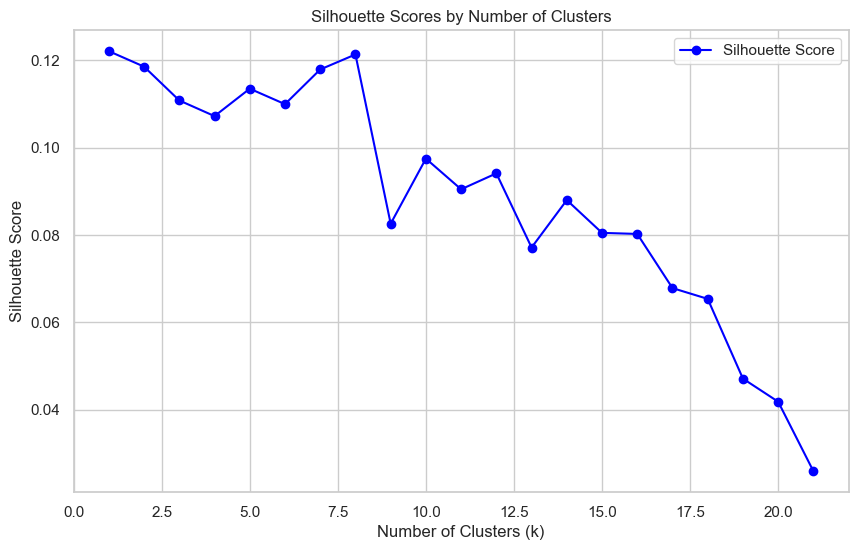

Silhouette score for best kappa: 0.144


In [11]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [12]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [13]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 1
The comments revolve around the persistent issue of Veterans' GI Bill payment delays and the adverse effects on veterans' education and financial stability. Many commentators expressed frustration over the late disbursement of financial aid, which severely impacts veterans' ability to pay for living expenses and continue their education. The U.S. Department of Veterans Affairs (VA) is criticized for inefficiencies and poor communication regarding the delays. Some comments highlight recent efforts by the VA to address the issue, such as announcements about resolving information technology problems and making back payments. The House is commended for passing legislation to improve the situation, yet users emphasize the need for more accountability and transparency within the VA. A sense of uncertainty pervades, with veterans sharing personal stories of hardship and expressing a mix of hope and skepticism about receiving timely payments. Overall, the group str

In [14]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

The summaries highlight ongoing challenges associated with the Veterans' GI Bill payment delays and their impact on veterans’ educational and financial well-being. Users express significant frustration with late disbursements that hinder their ability to manage living expenses and pursue education, critiquing the U.S. Department of Veterans Affairs (VA) for inefficiencies and poor communication. Recent efforts by the VA to resolve technology issues and legislation aimed at improvement are acknowledged, but there remains a strong demand for accountability and transparency.

Updates to the GI Bill, including changes in payment structures, eligibility expansions, and enhanced benefits for certain groups like Purple Heart recipients, are discussed. Legislative adjustments allow greater flexibility and support, such as extending Yellow Ribbon benefits and eliminating time limits for benefit usage. Improvements in communication between the VA and educational institutions are noted, alongside

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [15]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


In [16]:
from summarization_methods.topic_extraction_clustering_and_summarization import topic_extraction

topic = "Veterans' GI Bill payment delays"
language = 'English'

# extract topics using llm's (openai gpt-4o)
df_sum_3, df_topics_3 = topic_extraction(df=df_sum_3, text_col='content', prompt_template=prompt_template_topics, gpt_model='gpt-4o', topic=topic, language=language)

print('--------------------------------------------------------------------------------------------------------------------------------')
print(f'The length of the topics that produced are: {len(df_topics_3)}')
print(f'The columns of the new dataframe are: {df_topics_3.columns}')

  1%|█                                                                                                                        | 1/110 [00:00<01:20,  1.35it/s]

extracted topics: ["military sacrifice", "education benefits", "veterans' rights", "payment delays"]


  2%|██▏                                                                                                                      | 2/110 [00:01<01:39,  1.08it/s]

extracted topics: ["payment delays", "education benefits", "information-technology glitch"]


  3%|███▎                                                                                                                     | 3/110 [00:03<02:10,  1.22s/it]

extracted topics: ["payment delays", "communication issues", "financial hardships", "veterans' rights", "government inaction"]


  4%|████▍                                                                                                                    | 4/110 [00:04<02:02,  1.15s/it]

extracted topics: ["information-technology glitch", "payment delays", "government inaction", "education benefits"]


  5%|█████▌                                                                                                                   | 5/110 [00:05<01:56,  1.11s/it]

extracted topics: ['government inaction', 'education benefits']


  5%|██████▌                                                                                                                  | 6/110 [00:06<01:50,  1.06s/it]

extracted topics: ["education benefits", "government inaction"]


  6%|███████▋                                                                                                                 | 7/110 [00:07<01:48,  1.05s/it]

extracted topics: ['information-technology glitch', 'government inaction', 'education benefits']


  7%|████████▊                                                                                                                | 8/110 [00:08<01:44,  1.02s/it]

extracted topics: ["government inaction"]


  8%|█████████▉                                                                                                               | 9/110 [00:09<01:33,  1.08it/s]

extracted topics: ["information-technology glitch", "government inaction", "payment delays", "education benefits"]


  9%|██████████▉                                                                                                             | 10/110 [00:09<01:24,  1.18it/s]

extracted topics: ['information-technology glitch', 'government inaction', 'payment delays']


 10%|████████████                                                                                                            | 11/110 [00:10<01:29,  1.11it/s]

extracted topics: ['payment delays', 'education benefits', "information-technology glitch"]


 11%|█████████████                                                                                                           | 12/110 [00:11<01:30,  1.08it/s]

extracted topics: ["payment delays", "government inaction"]


 12%|██████████████▏                                                                                                         | 13/110 [00:12<01:33,  1.04it/s]

extracted topics: ["government inaction", "payment delays", "veterans' rights"]


 13%|███████████████▎                                                                                                        | 14/110 [00:13<01:34,  1.01it/s]

extracted topics: ["payment delays", "government inaction", "education benefits"]


 14%|████████████████▎                                                                                                       | 15/110 [00:14<01:35,  1.01s/it]

extracted topics: ["information-technology glitch", "payment delays", "education benefits"]


 15%|█████████████████▍                                                                                                      | 16/110 [00:15<01:23,  1.13it/s]

extracted topics: ["payment delays", "information-technology glitch"]


 15%|██████████████████▌                                                                                                     | 17/110 [00:16<01:26,  1.07it/s]

extracted topics: ["information-technology glitch", "payment delays", "government inaction"]


 16%|███████████████████▋                                                                                                    | 18/110 [00:17<01:26,  1.06it/s]

extracted topics: ["government inaction"]


 17%|████████████████████▋                                                                                                   | 19/110 [00:18<01:18,  1.16it/s]

extracted topics: ["education benefits", "government inaction"]


 18%|█████████████████████▊                                                                                                  | 20/110 [00:19<01:21,  1.11it/s]

extracted topics: ["payment delays", "government inaction"]


 19%|██████████████████████▉                                                                                                 | 21/110 [00:20<01:25,  1.04it/s]

extracted topics: ["government inaction", "education benefits", "veterans' rights"]


 20%|████████████████████████                                                                                                | 22/110 [00:21<01:23,  1.05it/s]

extracted topics: []


 21%|█████████████████████████                                                                                               | 23/110 [00:22<01:25,  1.02it/s]

extracted topics: ["government inaction", "payment delays", "education benefits"]


 22%|██████████████████████████▏                                                                                             | 24/110 [00:22<01:14,  1.16it/s]

extracted topics: ["information-technology glitch", "government inaction"]


 23%|███████████████████████████▎                                                                                            | 25/110 [00:23<01:08,  1.25it/s]

extracted topics: ["payment delays", "information-technology glitch", "government inaction", "education benefits"]


 24%|████████████████████████████▎                                                                                           | 26/110 [00:24<01:11,  1.17it/s]

extracted topics: ['government inaction', 'information-technology glitch']


 25%|█████████████████████████████▍                                                                                          | 27/110 [00:25<01:13,  1.13it/s]

extracted topics: ["government inaction"]


 25%|██████████████████████████████▌                                                                                         | 28/110 [00:26<01:16,  1.07it/s]

extracted topics: ["government inaction", "payment delays", "education benefits"]


 26%|███████████████████████████████▋                                                                                        | 29/110 [00:27<01:17,  1.04it/s]

extracted topics: ["payment delays", "information-technology glitch", "government inaction"]


 27%|████████████████████████████████▋                                                                                       | 30/110 [00:28<01:19,  1.00it/s]

extracted topics: ["information-technology glitch", "payment delays", "government inaction", "education benefits"]


 28%|█████████████████████████████████▊                                                                                      | 31/110 [00:29<01:25,  1.08s/it]

extracted topics: ["information-technology glitch", "government inaction", "payment delays", "education benefits"]


 29%|██████████████████████████████████▉                                                                                     | 32/110 [00:30<01:12,  1.08it/s]

extracted topics: ["payment delays", "education benefits"]


 30%|████████████████████████████████████                                                                                    | 33/110 [00:31<01:12,  1.06it/s]

extracted topics: []


 31%|█████████████████████████████████████                                                                                   | 34/110 [00:32<01:16,  1.01s/it]

extracted topics: ["payment delays", "government inaction"]


 32%|██████████████████████████████████████▏                                                                                 | 35/110 [00:33<01:05,  1.15it/s]

extracted topics: []


 33%|███████████████████████████████████████▎                                                                                | 36/110 [00:34<01:05,  1.12it/s]

extracted topics: ["payment delays", "education benefits"]


 34%|████████████████████████████████████████▎                                                                               | 37/110 [00:34<00:58,  1.24it/s]

extracted topics: ["payment delays", "government inaction", "education benefits"]


 35%|█████████████████████████████████████████▍                                                                              | 38/110 [00:35<01:03,  1.13it/s]

extracted topics: ["education benefits", "information-technology glitch", "government inaction"]


 35%|██████████████████████████████████████████▌                                                                             | 39/110 [00:36<01:06,  1.07it/s]

extracted topics: ["information-technology glitch", "payment delays"]


 36%|███████████████████████████████████████████▋                                                                            | 40/110 [00:37<01:00,  1.16it/s]

extracted topics: ["information-technology glitch", "payment delays", "education benefits", "government inaction"]


 37%|████████████████████████████████████████████▋                                                                           | 41/110 [00:38<01:01,  1.12it/s]

extracted topics: ["payment delays", "education benefits"]


 38%|█████████████████████████████████████████████▊                                                                          | 42/110 [00:39<01:02,  1.08it/s]

extracted topics: ["government inaction"]


 39%|██████████████████████████████████████████████▉                                                                         | 43/110 [00:40<01:02,  1.07it/s]

extracted topics: ["payment delays", "education benefits"]


 40%|████████████████████████████████████████████████                                                                        | 44/110 [00:41<00:55,  1.19it/s]

extracted topics: ["government inaction", "education benefits"]


 41%|█████████████████████████████████████████████████                                                                       | 45/110 [00:41<00:50,  1.29it/s]

extracted topics: ["education benefits"]


 42%|██████████████████████████████████████████████████▏                                                                     | 46/110 [00:42<00:54,  1.18it/s]

extracted topics: ["education benefits", "budget concerns"]


 43%|███████████████████████████████████████████████████▎                                                                    | 47/110 [00:43<00:55,  1.13it/s]

extracted topics: ["payment delays", "education benefits"]


 44%|████████████████████████████████████████████████████▎                                                                   | 48/110 [00:44<00:57,  1.07it/s]

extracted topics: ["education benefits"]


 45%|█████████████████████████████████████████████████████▍                                                                  | 49/110 [00:45<00:51,  1.19it/s]

extracted topics: ["payment delays", "education benefits"]


 45%|██████████████████████████████████████████████████████▌                                                                 | 50/110 [00:46<00:53,  1.12it/s]

extracted topics: ["government inaction", "education benefits"]


 46%|███████████████████████████████████████████████████████▋                                                                | 51/110 [00:47<00:54,  1.08it/s]

extracted topics: ["payment delays", "education benefits"]


 47%|████████████████████████████████████████████████████████▋                                                               | 52/110 [00:48<00:56,  1.02it/s]

extracted topics: ["information-technology glitch", "payment delays", "education benefits"]


 48%|█████████████████████████████████████████████████████████▊                                                              | 53/110 [00:49<00:49,  1.16it/s]

extracted topics: ["government inaction"]


 49%|██████████████████████████████████████████████████████████▉                                                             | 54/110 [00:50<00:49,  1.12it/s]

extracted topics: ["payment delays", "education benefits"]


 50%|████████████████████████████████████████████████████████████                                                            | 55/110 [00:50<00:43,  1.26it/s]

extracted topics: ["payment delays"]


 51%|█████████████████████████████████████████████████████████████                                                           | 56/110 [00:51<00:39,  1.37it/s]

extracted topics: ["payment delays", "education benefits"]


 52%|██████████████████████████████████████████████████████████████▏                                                         | 57/110 [00:51<00:37,  1.41it/s]

extracted topics: ["payment delays", "government inaction"]


 53%|███████████████████████████████████████████████████████████████▎                                                        | 58/110 [00:54<01:12,  1.39s/it]

extracted topics: ["payment delays", "education benefits"]


 54%|████████████████████████████████████████████████████████████████▎                                                       | 59/110 [00:55<01:06,  1.30s/it]

extracted topics: ["payment delays", "education benefits", "information-technology glitch"]


 55%|█████████████████████████████████████████████████████████████████▍                                                      | 60/110 [00:57<01:10,  1.41s/it]

extracted topics: ["payment delays", "education benefits"]


 55%|██████████████████████████████████████████████████████████████████▌                                                     | 61/110 [00:58<01:01,  1.25s/it]

extracted topics: []


 56%|███████████████████████████████████████████████████████████████████▋                                                    | 62/110 [01:00<01:05,  1.36s/it]

extracted topics: ["education benefits"]


 57%|████████████████████████████████████████████████████████████████████▋                                                   | 63/110 [01:00<00:52,  1.12s/it]

extracted topics: ["education benefits"]


 58%|█████████████████████████████████████████████████████████████████████▊                                                  | 64/110 [01:01<00:43,  1.05it/s]

extracted topics: ["payment delays", "education benefits"]


 59%|██████████████████████████████████████████████████████████████████████▉                                                 | 65/110 [01:02<00:43,  1.03it/s]

extracted topics: ["payment delays", "education benefits", "government inaction"]


 60%|████████████████████████████████████████████████████████████████████████                                                | 66/110 [01:03<00:43,  1.01it/s]

extracted topics: ["government inaction", "information-technology glitch"]


 61%|█████████████████████████████████████████████████████████████████████████                                               | 67/110 [01:04<00:42,  1.00it/s]

extracted topics: ["payment delays", "government inaction"]


 62%|██████████████████████████████████████████████████████████████████████████▏                                             | 68/110 [01:05<00:41,  1.01it/s]

extracted topics: ["payment delays"]


 63%|███████████████████████████████████████████████████████████████████████████▎                                            | 69/110 [01:06<00:40,  1.02it/s]

extracted topics: ["payment delays", "education benefits"]


 64%|████████████████████████████████████████████████████████████████████████████▎                                           | 70/110 [01:07<00:38,  1.04it/s]

extracted topics: []


 65%|█████████████████████████████████████████████████████████████████████████████▍                                          | 71/110 [01:08<00:37,  1.04it/s]

extracted topics: []


 65%|██████████████████████████████████████████████████████████████████████████████▌                                         | 72/110 [01:09<00:37,  1.03it/s]

extracted topics: ["education benefits"]


 66%|███████████████████████████████████████████████████████████████████████████████▋                                        | 73/110 [01:10<00:36,  1.01it/s]

extracted topics: ["education benefits"]


 67%|████████████████████████████████████████████████████████████████████████████████▋                                       | 74/110 [01:11<00:35,  1.02it/s]

extracted topics: ["education benefits"]


 68%|█████████████████████████████████████████████████████████████████████████████████▊                                      | 75/110 [01:12<00:34,  1.02it/s]

extracted topics: ["education benefits"]


 69%|██████████████████████████████████████████████████████████████████████████████████▉                                     | 76/110 [01:12<00:32,  1.03it/s]

extracted topics: ["education benefits"]


 70%|████████████████████████████████████████████████████████████████████████████████████                                    | 77/110 [01:13<00:28,  1.15it/s]

extracted topics: ["education benefits"]


 71%|█████████████████████████████████████████████████████████████████████████████████████                                   | 78/110 [01:14<00:29,  1.08it/s]

extracted topics: ["education benefits"]


 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                 | 79/110 [01:15<00:29,  1.03it/s]

extracted topics: ["education benefits"]


 73%|███████████████████████████████████████████████████████████████████████████████████████▎                                | 80/110 [01:16<00:29,  1.01it/s]

extracted topics: ["education benefits"]


 74%|████████████████████████████████████████████████████████████████████████████████████████▎                               | 81/110 [01:17<00:28,  1.03it/s]

extracted topics: ["education benefits"]


 75%|█████████████████████████████████████████████████████████████████████████████████████████▍                              | 82/110 [01:18<00:27,  1.03it/s]

extracted topics: ["education benefits"]


 75%|██████████████████████████████████████████████████████████████████████████████████████████▌                             | 83/110 [01:19<00:26,  1.01it/s]

extracted topics: ["education benefits"]


 76%|███████████████████████████████████████████████████████████████████████████████████████████▋                            | 84/110 [01:20<00:26,  1.01s/it]

extracted topics: ["education benefits"]


 77%|████████████████████████████████████████████████████████████████████████████████████████████▋                           | 85/110 [01:21<00:24,  1.01it/s]

extracted topics: ["education benefits"]


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                          | 86/110 [01:22<00:25,  1.07s/it]

extracted topics: []


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▉                         | 87/110 [01:23<00:21,  1.09it/s]

extracted topics: []


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 88/110 [01:24<00:20,  1.06it/s]

extracted topics: []


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████                       | 89/110 [01:25<00:19,  1.06it/s]

extracted topics: ["education benefits"]


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 90/110 [01:26<00:18,  1.06it/s]

extracted topics: ["education benefits"]


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 91/110 [01:27<00:17,  1.07it/s]

extracted topics: []


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 92/110 [01:28<00:16,  1.07it/s]

extracted topics: ["education benefits"]


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 93/110 [01:29<00:16,  1.06it/s]

extracted topics: ["education benefits"]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 94/110 [01:30<00:15,  1.04it/s]

extracted topics: ["education benefits"]


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 95/110 [01:30<00:13,  1.12it/s]

extracted topics: []


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 96/110 [01:31<00:12,  1.08it/s]

extracted topics: []


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 97/110 [01:32<00:12,  1.07it/s]

extracted topics: ["education benefits"]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 98/110 [01:33<00:11,  1.07it/s]

extracted topics: ["education benefits"]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 99/110 [01:34<00:10,  1.07it/s]

extracted topics: ["education benefits"]


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 100/110 [01:35<00:09,  1.04it/s]

extracted topics: []


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 101/110 [01:36<00:09,  1.03s/it]

extracted topics: ["education benefits"]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 102/110 [01:37<00:08,  1.01s/it]

extracted topics: ["education benefits"]


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 103/110 [01:38<00:06,  1.01it/s]

extracted topics: ["education benefits"]


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 104/110 [01:39<00:05,  1.01it/s]

extracted topics: ["education benefits"]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 105/110 [01:40<00:04,  1.16it/s]

extracted topics: ["education benefits"]


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 106/110 [01:40<00:03,  1.32it/s]

extracted topics: ["education benefits"]


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 107/110 [01:41<00:02,  1.20it/s]

extracted topics: ["education benefits"]


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 108/110 [01:42<00:01,  1.15it/s]

extracted topics: ["education benefits"]


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 109/110 [01:44<00:00,  1.07it/s]

extracted topics: []


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [01:44<00:00,  1.05it/s]

extracted topics: ["education benefits"]
--------------------------------------------------------------------------------------------------------------------------------
The length of the topics that produced are: 184
The columns of the new dataframe are: Index(['comment', 'topics'], dtype='object')


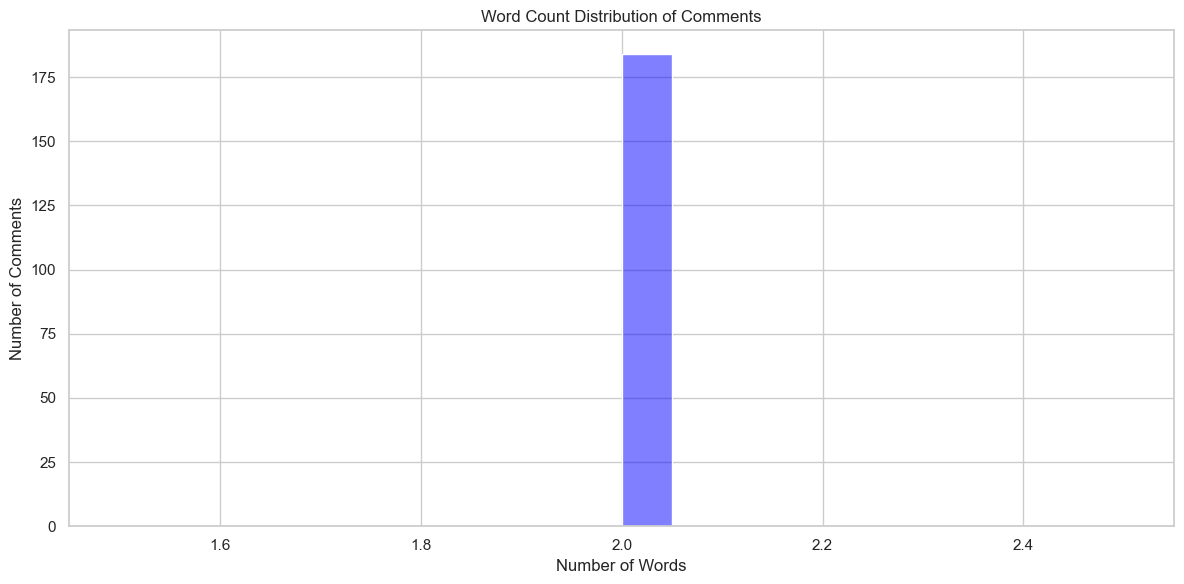

In [17]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [01:01<00:00,  2.98it/s]


Using PCA to transformed embeddings


 71%|██████████████████████████████████████████████████████████████████████████████████████▍                                  | 35/49 [00:07<00:02,  4.82it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 5


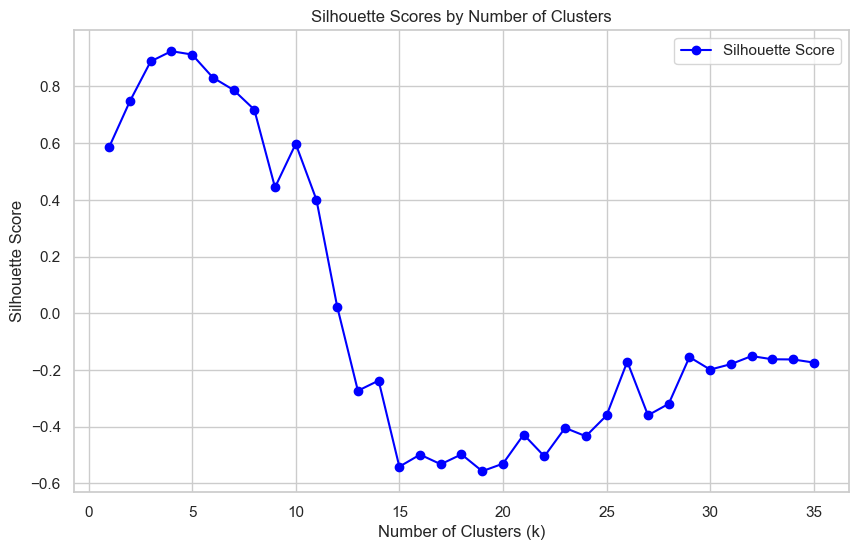

Silhouette score for best kappa: 0.964


In [18]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_4, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

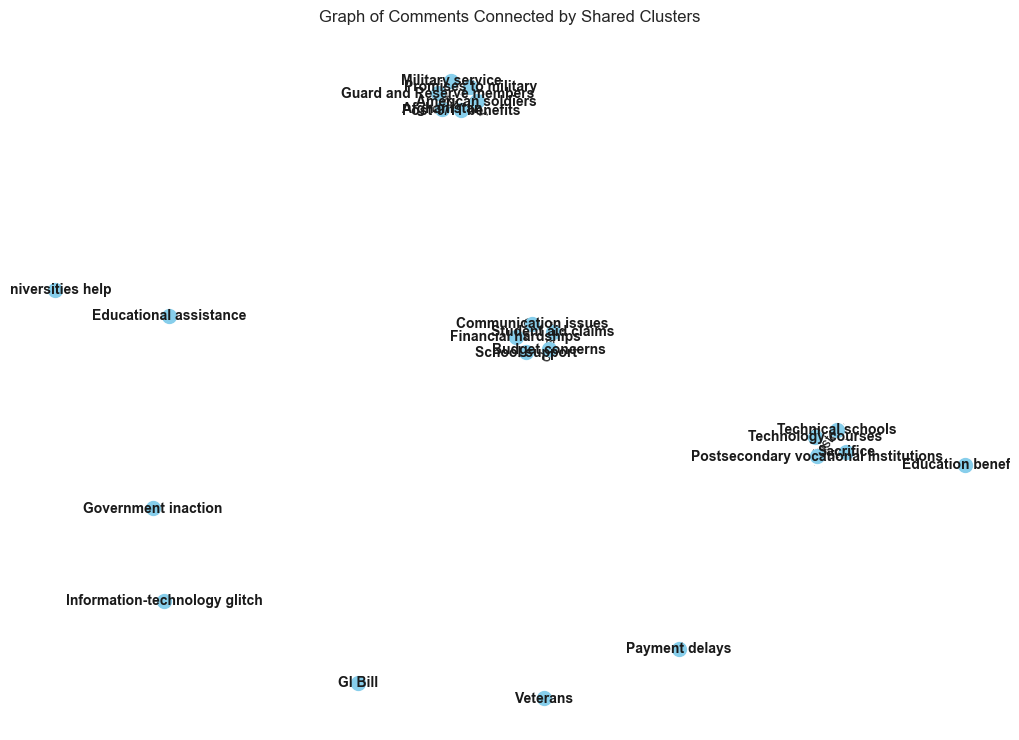

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Step 1: Create a graph
G = nx.Graph()

# Add nodes (comments)
for comment in df_topics_4['topics'].unique():
    G.add_node(comment)

# Step 2: Add edges based on shared clusters
cluster_to_comments = {}

for index, row in df_topics_4.iterrows():
    comment_id = row['topics']
    cluster_label = row['labels']
    
    if cluster_label not in cluster_to_comments:
        cluster_to_comments[cluster_label] = set()
    cluster_to_comments[cluster_label].add(comment_id)

# Step 3: Connect comments that share clusters
for comments in cluster_to_comments.values():
    comments = list(comments)
    for i in range(len(comments)):
        for j in range(i + 1, len(comments)):
            G.add_edge(comments[i], comments[j])

# Step 4: Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray', font_size=10, font_weight='bold')

# Draw edge labels to represent shared clusters
edge_labels = {(u, v): f'cluster' for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph of Comments Connected by Shared Clusters")
plt.show()

In [19]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_4 = df_topics_4.rename(columns={'comment': 'comment_id'})

df_topics_4 = df_topics_4.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_4 = df_topics_4.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_4 = grouped_comments_4.reset_index()

In [20]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [21]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_4, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
I'm sorry, I don't have the comments you mentioned. Could you please provide them again?
-------------------------------------------------------------------------------------
Summary for cluster label: 1
I'm sorry, I cannot assist with that.
-------------------------------------------------------------------------------------
Summary for cluster label: 2
I'm sorry, but it seems like the request is missing the specific content of the comments you want summarized. Could you please provide the comments so that I can create a summary for you?
-------------------------------------------------------------------------------------
Summary for cluster label: 3
The comments highlight recurring delays in receiving GI Bill payments, causing financial strain for veterans who rely on these funds for essential expenses. Many express frustration and concern over the lack of timely communication and updates regarding payment schedules. There is a call for improved systems a

In [22]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

The recurring delay in GI Bill payments is causing significant financial strain for veterans, who depend on these funds for essential living expenses. Widespread frustration is evident in the comments, primarily due to the lack of timely communication and transparency from the managing agencies handling these payments. Veterans are calling for systemic improvements to ensure reliable and prompt disbursements and emphasize the need for better support and accountability from responsible agencies. The current situation not only jeopardizes their financial stability but also exacerbates stress and uncertainty among veterans.


### STORE THE FINAL SUMMARIES IN A CSV

In [23]:
final_summaries = {
    'original_summary': original_summary, 
    'random_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries_2.csv', index=False)

In [24]:
final_summaries_df

,technique,summary
0,original_summary,– a major snafu has hit benefit payments to st...
1,random_grouping_summarization,The discussion on Veterans' Post-9/11 GI Bill ...
2,label_based_summarization,The summaries collectively emphasize the signi...
3,cluster_based_summarization,The summaries highlight ongoing challenges ass...
4,topic_extraction_cluster_based_summarization,The recurring delay in GI Bill payments is cau...


In [25]:
import pandas as pd

final_summaries_df = pd.read_csv('outputs/final_summaries.csv')

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

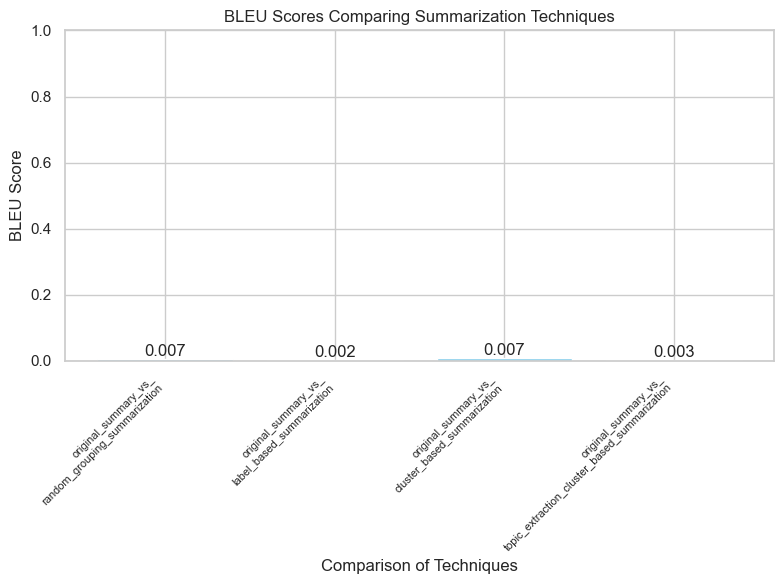

In [26]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

In [27]:
for summary in final_summaries_df.summary:
    print(summary)
    print('---------------------------------------------------------------------------------')

– a major snafu has hit benefit payments to student veterans under the gi bill — and congressional aides tells nbc that they have been told the veterans are never going to be paid back . the aides say they were told by the department of veterans affairs that the va will not be making retroactive payments to veterans who were underpaid for their housing allowance because it would mean reviewing around 2 millions claims , further delaying implementation of a new system , which has already been pushed back to dec. 2019. under the forever gi bill signed into law by president trump last year , students are supposed to be paid housing allowance based on where they take the most classes , not on where the school ' s main campus is located . tanya ang , vice president of veterans education success , tells the military times that the va ' s excuse of retroactive payments creating too much work isn ' t good enough . " that could be hundreds of dollars for some students — per month , " she says .

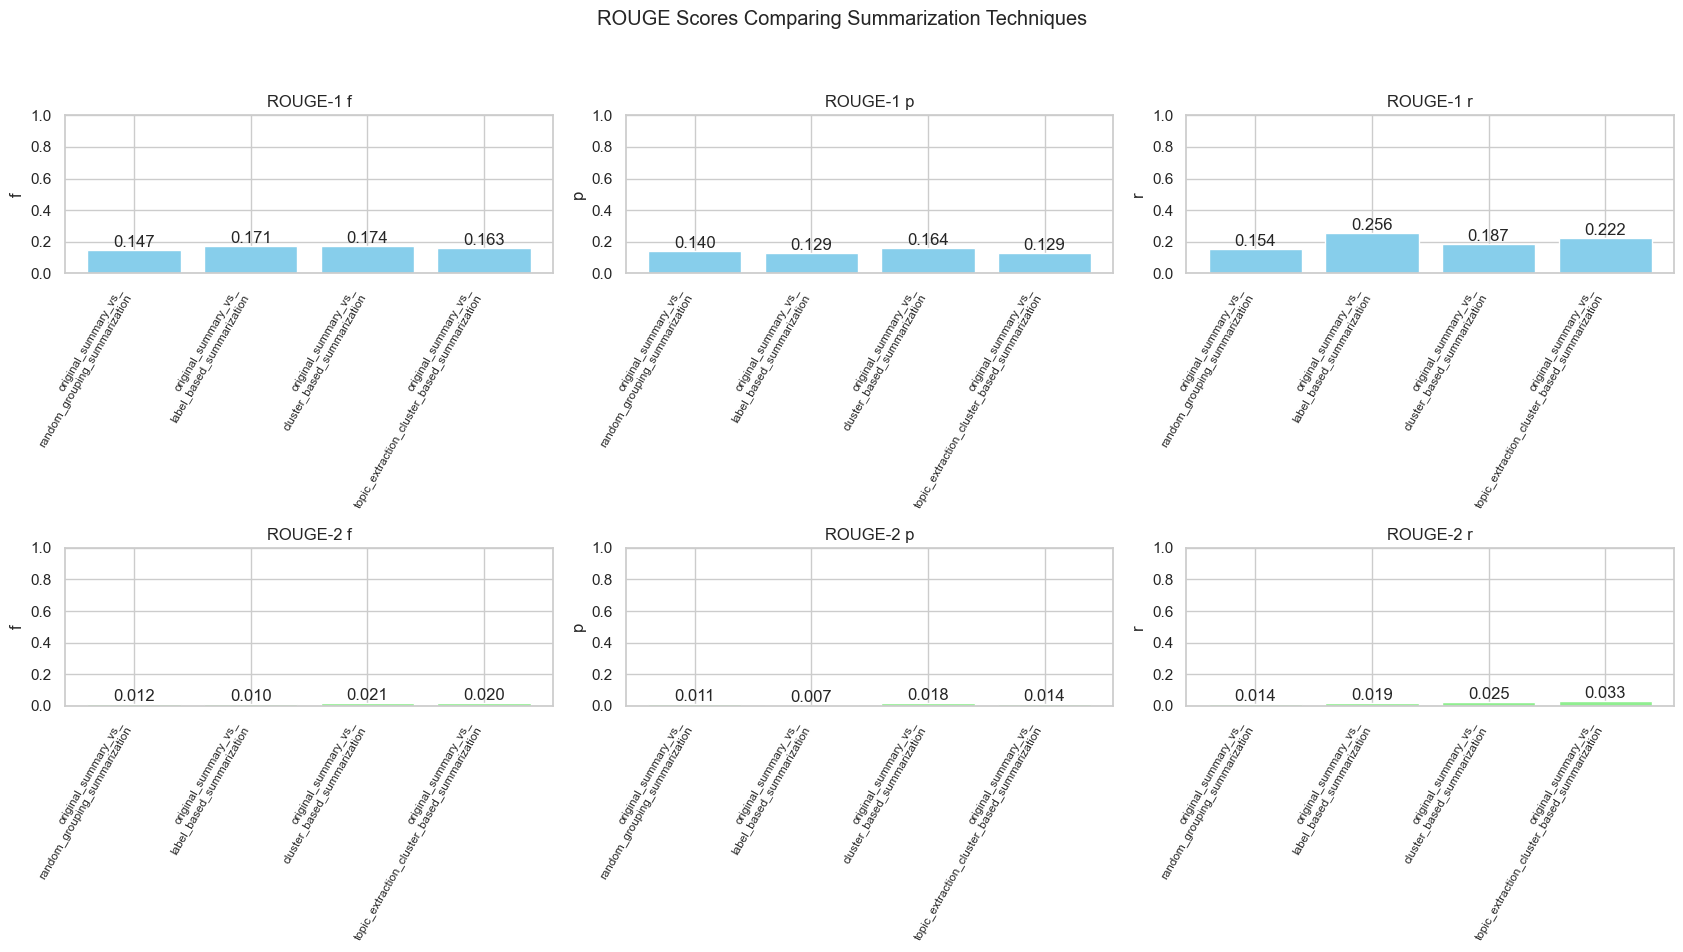

In [28]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\models\roberta\modeling_roberta.py:370: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default

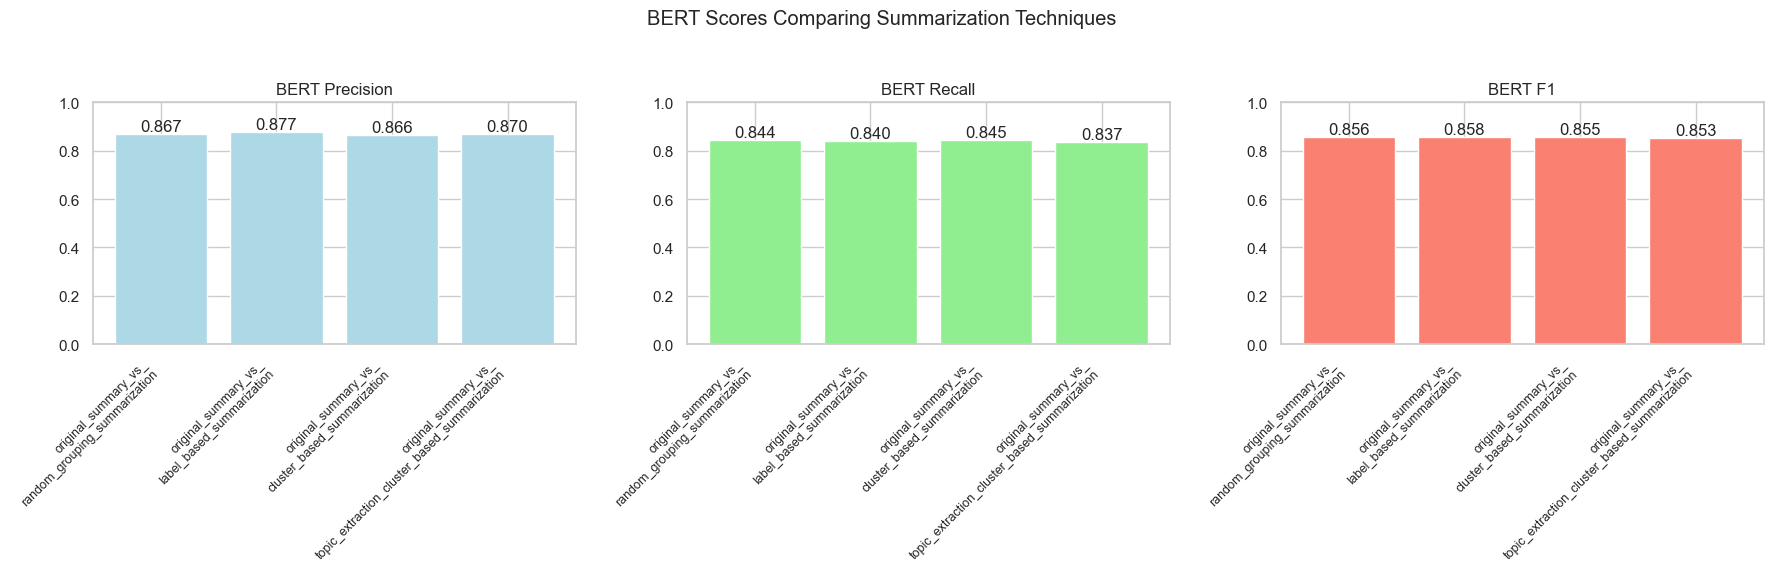

In [29]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')